##### Credit and Author Notes: Styling and Flow of this notebook was modelled after Univ6080 Notebook for Vectors and Matrices
Citations will be made throughout the cells. 
Further references will be given at the end of the notebook
This notebook is created off of the material from Mathematics for Machine Learning, by Deisenroth,Faisal, & Cheng.  Additionally, Hammad Shaikh and his notebooks from Mathematics of Machine Learning by Siraj

# UNIV*6080 Major Project
A Notebook on Chapter 9 - Linear Regression

by Alex S. Moksyakov.

0878632

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression
Linear regression models the relationship between two variables that can be statistically related. What linear regression is attempting to model is the impact of one variable's variance, say X (also known as independent variable), to the other variable it is related to, Y (also known as the dependent variable) <cite>(Jekel, 2016)</cite>.

We can take the linear regression in it's simple form as:
$$
Y = \boldsymbol F(Xn)\boldsymbol +\epsilon \sim \mathcal N(0, \sigma^2)
$$
where $$ \epsilon\ $$ is an i.i.d random variable that describes the measurement noise. <cite>(Fleshman, 2019)</cite>


The task in all linear regression models is to find the function that models all the data accordingly. The challenge in linear regression is to find that same function that can also generalize well in predicting function values for inputs it has never before seen. <cite>(Deisenroth, Faisalm, Cheng, 2020)</cite>

# Finding the right Regression Model

In all machine learning models, there are an number of parameters that are needed to create a 'successful' model. 
For linear regression, there is a requirement to solve a number of problems such as:

#### Choice of Model: 
Given a dataset, which function classes are good candidates for modeling the data?

#### Finding good parameters:
How do we find good model parameters? Here, we will need to look at different loss/objective functions (they determine what a “good” fit is) and optimization algorithms that allow us to minimize this loss.

#### Overfitting
Overfitting is a problem when the regression function fits the training data “too well” but does not generalize to unseen test data. <cite>(Deisenroth, Faisalm, Cheng, 2020)</cite>

# Problem Formulation

This chapter (and the rest of this notebook) will focus on parametric models, meaning we are looking for $ \theta\ $ that does the best job of modelling our data.

In linear regression, we consider  the  special  case  that  the  parameters for Theta appear  linearly  in  our model. An example of linear regression is given by:

$$
y = \boldsymbol x^T\boldsymbol\theta + \epsilon\,,\quad \epsilon \sim \mathcal N(0, \sigma^2)
$$

This formulation describes linear functions and the parameter Theta that makes up the slope of these linear functions. <cite>(Deisenroth, 2020)</cite>

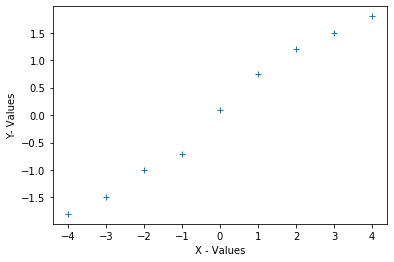

In [2]:
#Creating a training set of data for our linear model
##This data was purposely chosen to be presented in separated dots - to show a linear upward trend 

X = np.array([-4,-3, -2, -1, 0,1, 2, 3, 4]).reshape(-1,1) 
Y = np.array([-1.8,-1.5,-1, -0.7, 0.1,0.75,1.2, 1.5, 1.8]).reshape(-1,1) 

#We use reshape to create a vector out of our initial Array

####Plot the data
plt.figure()
plt.plot(X, Y, '+')
plt.xlabel('X - Values')
plt.ylabel('Y- Values');

Now that we have a simple data set shown above, we can explore different methods of linear regression to find the desired parameters for $\theta$.

# Maximum Likelihood

When talking about regression and finding the desired parameters $\theta$, a popular approach is using the maximum likelihood estimation, where the goal is to find the parameters $\theta$ that maximize the likelihood of achieving the desired value (duh!) <cite>(Brownlee, 2019)</cite>

Maximum Likelihood Estimation, or MLE for short, is a probabilistic framework for estimating the parameters of a model.

In Maximum Likelihood Estimation, we wish to maximize the conditional probability of observing the data (X) given a specific probability distribution and its parameters $\theta$, stated formally as:

$P(X; \theta)$

The join probability distribution of all the possible observations is depicted as X. It captures all the observations from 1 to n. The question that can be asked right now is how do we find the desired parameters $\theta$ that maximize our likelihood? Well typically, we use gradient ascent (or descent on negative likelihood)<cite>(Deisenroth, Faisalm, Cheng, 2020)</cite>. In practice, instead of maximizing the likelihood directly, we apply the log-transformation to the likelihood function and minimize the negative log-likelihood.

### Log-likelihood Function
$$ - logp(y_n | x_n, \theta) = - log \prod_{n=1}^N p(y_n | \boldsymbol x_n, \boldsymbol\theta)\ = - \sum_{n = 1}^N logp(y_n | x_n, \theta)
$$
The above equation is our negative log-likelihood equation. This exploits that the likelihood factorizes over the number of data points due to our independence assumption on the training data. <cite>(Deisenroth, Faisalm, Cheng, 2020)</cite>


In linear regression models - our likelihood is Gaussian, arriving at our new term:
$$
logp(y_n | x_n, \theta) = - \frac{1}{2\sigma^2}(y_n - x_n^t\theta)^2
$$

For this demonstration, we have left out the independent constant term at the end of this expression

Using the above relationship within our negative log-likelihood we finally obtain our likelihood function:
$$
L(\theta):= \frac{1}{2\sigma^2} \sum_{n = 1}^N (y_n - x_n^t \sigma)^2 = \frac{1}{2\sigma^2} ||y - X\sigma||^2
$$

Let's compute the MLE for a linear regressive situation

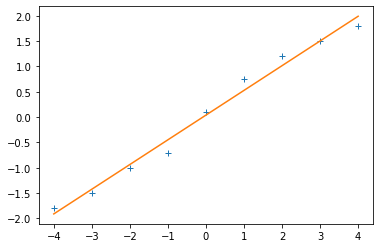

In [3]:
###Code created following the tutorial provided by Python Programming . net
####URL : https://pythonprogramming.net/how-to-program-best-fit-line-machine-learning-tutorial/

def MLE_line(x, y):
    
    # number of points in the training data set
    n = len(x)    
    # Get the mean for both X and Y
    x_mean = sum(x)/n
    y_mean = sum(y)/n
        
    # calculate slope by iterating through all of our points and means
    num = 0
    denom = 0
    for i in range(n):
        num += (x[i]-x_mean)*(y[i]-y_mean)
        denom += (x[i]-x_mean)**2
    slope = num/denom
    
    # calculate intercept
    intercept = y_mean - slope*x_mean
    return slope, intercept

plt.plot(X,Y, '+')
(m,b) = MLE_line(X,Y)

regression_line = [(m*x)+b for x in X]
plt.plot(X, regression_line)

As we can see, we have fit a line to our data. This line is the maximum likelihood estimator for our particular set of data. Let's see us call our function on a completely different, linear set of data

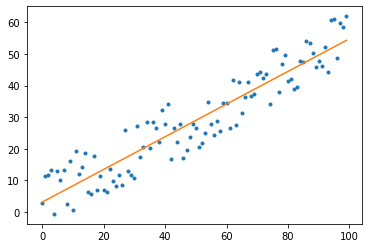

In [5]:
###Data was adopted from William Fleshman in his Fundamentals Of Machine Learning Article (Fleshman, 2019)

x = np.arange(100)
#We add noise in the form of delta so that our points can be speratic 
noise = np.random.uniform(-10,10, size=(100,))
y = .5 * x +4 + noise


plt.plot(x,y, '.')

(m,b) = MLE_line(x,y)

#We plot a line from our slope and intercept from MLE_line function
regression_line = [(m*x)+b for x in x] #(Kinsley, 2016)
plt.plot(x, regression_line)

### But what happens if we try to fit our line on polynomial data?

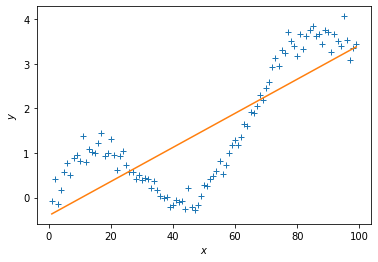

In [7]:
###Data was adopted from Math of Machine Learning Course by Siraj by Hammad Shaikh
####URL: https://github.com/hammadshaikhha/Math-of-Machine-Learning-Course-by-Siraj

def f(x):
    epsilon = np.random.normal(0, 0.2, len(x)+1)
    # Nonlinear data with noise
    ynonlinear = [np.sin(i/10) + (i/50)**2 + epsilon[i] for i in x]
    return ynonlinear

X = range(1,100)
y = f(X)

plt.figure()
plt.plot(X, y, '+')
plt.xlabel("$x$")
plt.ylabel("$y$");


(m,b) = MLE_line(X,y)

regression_line = [(m*x)+b for x in X]
plt.plot(X, regression_line)

### Here we can see that for polynomial data, our MLE does a poor job - why?

Our MLE have been straight lines. For obvious reasons, straight lines are not expressive for dynamic data. 
To get our MLE more dynamic, we can perform a non-linear transformation $$\theta(x)$$ on all the inputs and combine the outputs of this transformation. Thus, we are left with the corresponding model:

$$
p(y|x, \theta) = \mathcal N(y|\phi^t(x)\theta, \sigma^2)
$$

$$
= \phi^t(x)\theta + \epsilon 
$$
$$
=\sum_{k=0}^K\theta_k \phi_k (x) + \epsilon$$
<cite>(Agarwal, 2018)</cite>
<cite>(Deisenroth, Faisalm, Cheng, 2020)</cite>
#### Polynomial Regression

With the context of this demonstration, we are focused on regression problems in the form of:
$$
y = \phi(x)^T\boldsymbol\theta\ + \epsilon
$$

A typical transformation matrix that is used in these regression problems is shown below
$$
\boldsymbol\phi(x)= 
\begin{bmatrix}
x^0\\
x^1\\
\vdots\\
x^K
\end{bmatrix}\in\mathbb{R}^{K+1}\,.
$$

<cite>(Deisenroth, 2020)</cite>

This relates to polynomial regression in the sense that we are 'lifting' the original 1D input space into now a K - dimensional space feature space consisting of all monomials $x^k$. With these features and utilizing the concept of the transformation matrix, we can perform proper regression on a polynomial of degree k -1:

$$
f(\boldsymbol x) = \sum_{k = 1}^K \theta_k x^k\ = \phi^T(\boldsymbol x) \theta
$$\
<cite>(Deisenroth, Faisalm, Cheng, 2020)</cite>

In [8]:
### The code below will generate a MLE with degree 4
####Adopted from Math of Machine Learning Course by Siraj by Hammad Shaikh
def transpose_model(y,x):
    # We transpose our newly created X matrix
    Xtranspose = np.matrix.transpose(x)
    
    # Closed form solution
    Theta_ = np.dot(np.linalg.inv(np.dot(Xtranspose,x)),np.dot(Xtranspose,y))
    return Theta_

In [12]:
# Outcome vector
outcome = np.array(y)

# Fit nonlinear data using a polynomial 
# We create an initial vector of one's to accomodate for our intercept
ones = np.ones(len(y))

# x^2 column
x_2 = [i ** 2 for i in X]
# x^3 column
x_3 = [i ** 3 for i in X]
# x^4 column
x_4 = [i ** 4 for i in X]


design = np.column_stack([ones, X, x_2, x_3, x_4])

parameter = transpose_model(outcome,design)

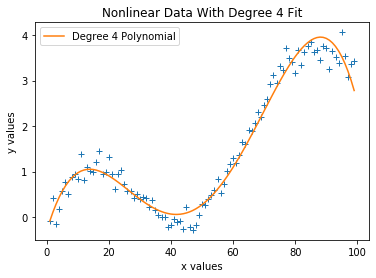

In [13]:
plt.plot(X, y, '+')
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("Nonlinear Data With Degree 4 Fit")

# Plot linear regression (degree 4)
pred_yhat = parameter[0] + parameter[1]*np.asarray(X) + parameter[2]*np.asarray(x_2) + parameter[3]*np.asarray(x_3) + parameter[4]*np.asarray(x_4)
polynomial_fit, = plt.plot(X, pred_yhat)

# Legend for linear regression scatter plot
plt.legend([polynomial_fit], ['Degree 4 Polynomial'])
plt.show()

As we can see, utilizing the transformation matrix logic we are able to plot a MLE with a degree 4 polynomial on non-linear data. 

Feel free to add or remove degree's for the polynomial. This degree acts as a hyper parameter as adjusting this can lead to overfitting or underfitting.

#### Example of overfitting

In [14]:
outcome = np.array(y)

ones = np.ones(len(y))

#We add more columns to represent the higher-order of the polynomial we are trying to fit

# x^2 column
x_2_ = [i ** 2 for i in X]

# x^3 column
x_3_ = [i ** 3 for i in X]

# x^4 column
x_4_ = [i ** 4 for i in X]

# x^5 column
x_5_ = [i ** 5 for i in X]

# x^6 column
x_6_ = [i ** 6 for i in X]

# x^7 column
x_7_ = [i ** 7 for i in X]

# x^8 column
x_8_ = [i ** 8 for i in X]

# x^9 column
x_9_ = [i ** 9 for i in X]

design_ = np.column_stack([ones, X, x_2_, x_3_, x_4_, x_5_, x_6_,x_7_,x_8_,x_9_])
betahat_ = transpose_model(outcome,design_)

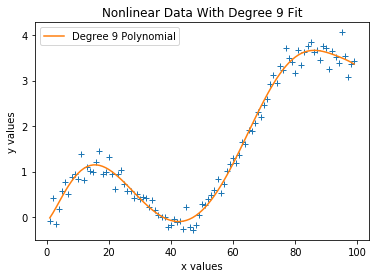

In [15]:
plt.plot(X, y, '+')
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("Nonlinear Data With Degree 9 Fit")

# Plot linear regression (degree 9)
pred_yhat_ = betahat_[0] + betahat_[1]*np.asarray(X) + betahat_[2]*np.asarray(x_2_) + betahat_[3]*np.asarray(x_3_) + betahat_[4]*np.asarray(x_4_) + betahat_[5]*np.asarray(x_5_) + betahat_[6]*np.asarray(x_6_) + betahat_[7]*np.asarray(x_7_) + betahat_[8]*np.asarray(x_8_) + betahat_[9]*np.asarray(x_9_)
simple_, = plt.plot(X, pred_yhat_)

plt.legend([simple_], ['Degree 9 Polynomial'])
plt.show()

#### In the above example we may see that our model is fitting 'better' - however, this example demonstrates the effects of the degree hyperparameter and shows that eventually, the MLE will just overfit to the training data set

### Maximum A Posteriori Estimation

As we just saw with the examples above - the MLE is prone to overfitting. 
To mitigate the effect of these big parameter values that are causing overfitting, we can place a prior distribution $p(\theta)$ on the parameters.

When a specific dataset is created, instead of doing what we did earlier with maximizing the likelihood, we now seek parameters that maximize the posterior distribution $P(\theta | X,Y)$. This new type of regression is called Maximum A Posteriori (MAP) Estimation.

$$
p(\boldsymbol\theta|\mathcal X, \mathcal Y) = \frac{\overbrace{p(\mathcal Y|\mathcal X, \boldsymbol\theta)}^{\text{likelihood}}\overbrace{p(\boldsymbol\theta)}^{\text{prior}}}{\underbrace{p(\mathcal Y|\mathcal X)}_{\text{evidence}}}
$$
<cite>(Deisenroth, 2020)</cite>

The MAP estimate of the parameters is
$$
\boldsymbol\theta^{\text{MAP}} = (\boldsymbol\Phi^T\boldsymbol\Phi + \frac{\sigma^2}{\alpha^2}\boldsymbol I)^{-1}\boldsymbol\Phi^T\boldsymbol y
$$
where $\sigma^2$ is the variance of the noise.

## Bayesian Linear Regression

In the last two regression models, we focused on estimating the model parameters $\theta$ by means of MLE or MAP estimation. We will now introduce a third type of regression called the Bayesian Linear Regression. In the Bayesian viewpoint, we formulate linear regression using probability distributions rather than point estimates <cite>(Koehrsen,2018)</cite>.

When making predictions, Bayesian Linear Regression does not attempt to make a point estimate of the parameters, but instead it makes it on the full posterior distribution over the parameters. 

#### The Model
In our newly introduced Bayseian Linear Regression, we consider the model as:
$$
prior : p(\theta) = \mathcal N(m_0, \mathcal S_0)
$$
$$
likelihood : P(y | x, \theta ) = \mathcal N(y | \phi^T (x)\theta, \sigma^2)
$$

And assuming Gaussian, we can place a prior  $p(\theta) = \mathcal N(m_0, \mathcal S_0)$ on  $\theta$


The aim of Bayesian Linear Regression is not to find the single “best” value of the model parameters, but rather to determine the posterior distribution for the model parameters <cite>(Deisenroth, Faisalm, Cheng, 2020)</cite>.

### Posterior Distribution

From our earlier definitions of likelihood and prior, we can compute their closed form solutions as:
$$
p(\theta|\mathcal X, \mathcal Y) = \mathcal N(\theta|m_N,\mathcal S_N),
$$ 
$$
\mathcal S_N = (\mathcal S_0^-1 + \sigma^-2 \phi ^T \phi )^-1
$$
$$
\mathcal m_N = \mathcal S_N (\mathcal S_0^-1 m_0 + \sigma ^-2 \phi^T y)
$$

Where N describes the size of our training set <cite>(Deisenroth, Faisalm, Cheng, 2020)</cite>

Assume a parameter prior $p(\boldsymbol\theta) = \mathcal N (\boldsymbol 0, \alpha^2\boldsymbol I)$ <cite>(Koehrsen, 2018)</cite>

In [16]:
###Adopted from Math of Machine Learning Course by Siraj by Hammad Shaikh
####In conjuction with Bayesian Machine Learning by Martin Krasser

def estimate_model(y,x,bayes):
    X_transpose = np.matrix.transpose(x)
    # Closed form solution 
    # Also, if the Bayes value = 0, we end up with a regular square loss function
    _Dist = np.dot(np.linalg.inv(np.add(np.dot(X_transpose,x),bayes)),np.dot(X_transpose,y))
    return _Dist

In [17]:
outcome = np.array(y)

ones = np.ones(len(y))

# x^2 column
x_2 = [i ** 2 for i in X]
# x^3 column
x_3 = [i ** 3 for i in X]
# x^4 column
x_4 = [i ** 4 for i in X]
# x^5 column
x_5 = [i ** 5 for i in X]


# Define design matrix
_multiple = np.column_stack((ones,x_2,x_3,x_4,x_5))

# Estimate the parameter values for multiple linear regression model
betahat_multiple = estimate_model(outcome,_multiple,0)

In [19]:
#Based on assumption from above
bayes_comp = np.sqrt(np.identity(len(_multiple[1,:])))

# Estimate for bayesian regression
_multiple_bayes = estimate_model(outcome,_multiple,bayes_comp)

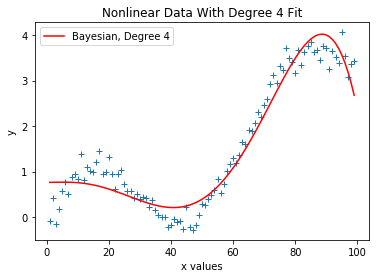

In [21]:
plt.plot(X, y, '+')
plt.xlabel("x values")
plt.ylabel("y")
plt.title("Nonlinear Data With Degree 4 Fit")


# Plot bayesian regression 
bayesian, = plt.plot(X, _multiple_bayes[0] + np.sort(x_2)*_multiple_bayes[1] 
        + np.sort(x_3)*_multiple_bayes[2] + np.sort(x_4)*_multiple_bayes[3] 
         + np.sort(x_5)*_multiple_bayes[4],'r')


plt.legend([bayesian], ['Bayesian, Degree 4'])

# Show scatter plots
plt.show()

### MLE vs Bayesian

For a fun example, let's use the exact same data we have been using and plot our MLE from before on the same graph as our newly defined Bayesian.



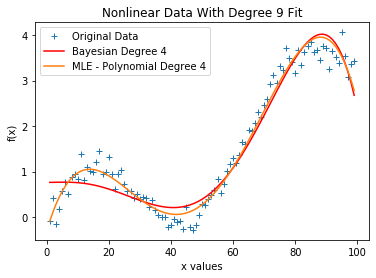

In [23]:
plt.plot(X, y,'+', label="Original Data")
plt.xlabel("x values")
plt.ylabel("f(x)")
plt.title("Nonlinear Data With Degree 9 Fit")


# Plot bayesian regression 
bayesian, = plt.plot(X, _multiple_bayes[0] + np.sort(x_2)*_multiple_bayes[1] 
        + np.sort(x_3)*_multiple_bayes[2] + np.sort(x_4)*_multiple_bayes[3] 
         + np.sort(x_5)*_multiple_bayes[4], 'r', label='Bayesian Degree 4')

# Set legend for plot on the right
polynomial_fit, = plt.plot(X, pred_yhat, label="MLE - Polynomial Degree 4")
plt.legend()

# Show scatter plots
plt.show()

## Conclusion

As we can see, utilizing similar 'degrees;, in terms of this demonstration MLE actually performs better. MLE is a very common framework to use for linear or polynomial regression. The key downfall to MLE is the fact that it can easily overfit data.

This brings me to the conclusion of this notebook, covering chapter 9 of https://mml-book.github.io/book/mml-book.pdf dubbed "Linear Regression".

This notebook was created to serve as the final project for UNIV*6080 - Computational Thinking for AI

#### Acknolwdgements
I would like to acknolwedge a few individuals for the creation of this notebook (they're included in the citations/references as well)

Firstly, Dr. Graham Taylor for this course.

Secondly, Hammad Shaikh for his work in Linear/Bayesian Regression

Thirdly, Martin Krasser for his work in Bayesian Linear Regression


and also the authors of https://mml-book.github.io/book/mml-book.pdf - specifically Marc Deisenroth for the book and notebooks he created.

Thank you!

### Further reading

For all further reading, please refer to the references attached. However, for some immediate information please see the following:

[Martin Krasser's GitRepo for Bayesian Machine Learning](https://github.com/krasserm/bayesian-machine-learning)

[Hammad Shaik's GitRepo for All things Associated with Mathematics in Machine Learning](https://github.com/hammadshaikhha/Math-of-Machine-Learning-Course-by-Siraj)

[Zhiya Zuo's Blog for MLE vs MPA](https://zhiyzuo.github.io/MLE-vs-MAP/#map)

[Jason Brownlee's Excellent Series on Machine Learning and Data Science](https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/)

[Vivek Palaniappen's Post on an introduction to MLE and how to implement it ](https://towardsdatascience.com/maximum-likelihood-estimation-how-it-works-and-implementing-in-python-b0eb2efb360f)


### References:

A lot of these were referenced within the text, however some were not but their work was used in building my own knowledge

Agarwal, A. (2018, October 8). Polynomial Regression. Retrieved from https://towardsdatascience.com/polynomial-regression-bbe8b9d97491.

Brownlee, J. (2019, October 31). A Gentle Introduction to Linear Regression With Maximum Likelihood Estimation. Retrieved from https://machinelearningmastery.com/linear-regression-with-maximum-likelihood-estimation/.

Brownlee, J. (2019, August 13). How to Implement Linear Regression From Scratch in Python. Retrieved from https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/.

DEISENROTH, MARC PETER. FAISAL, A. ALDO. ONG, CHENG SOON. (2020). Mathematics For Machine Learning. Retrieved from https://mml-book.github.io/book/mml-book.pdf

Fleshman, W. (2019, March 9). Fundamentals of Machine Learning (Part 2). Retrieved from https://towardsdatascience.com/maximum-likelihood-estimation-984af2dcfcac.

Jekel, C. (2016, October). Maximum Likelihood Estimation Linear Regression. Retrieved from https://jekel.me/2016/Maximum-Likelihood-Linear-Regression/.

Kinsley, H. (2016, April). How to Program the Line of Best Fit. Retrieved from https://pythonprogramming.net/how-to-program-best-fit-line-machine-learning-tutorial/.

Koehrsen, W. (2018, April 25). Bayesian Linear Regression in Python: Using Machine Learning to Predict Student Grades Part 1. Retrieved from https://towardsdatascience.com/bayesian-linear-regression-in-python-using-machine-learning-to-predict-student-grades-part-1-7d0ad817fca5.

Koehrsen, W. (2018, April 20). Introduction to Bayesian Linear Regression. Retrieved from https://towardsdatascience.com/introduction-to-bayesian-linear-regression-e66e60791ea7.

Palaniappan, V. (2018, December 9). Maximum Likelihood Estimation: How it Works and Implementing in Python. Retrieved from https://towardsdatascience.com/maximum-likelihood-estimation-how-it-works-and-implementing-in-python-b0eb2efb360f.

Tran, N. (2019, March 20). Machine Learning: Polynomial Regression with Python. Retrieved from https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386.

Zhiyzuo. (2018, February 24). MLE vs. MAP. Retrieved from https://zhiyzuo.github.io/MLE-vs-MAP/#map.